In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
subs = pd.read_pickle('C:/Users/ytw23/Downloads/subscribers')

In [3]:
subs.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,0.0,False,2020-03-16,False,0.0,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,0.0,False,2020-02-11,False,0.0,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0,0.0367,ar,False,False,NaN


In [4]:
subs[ 'weekly_consumption_hour'].unique()

array([         nan,  22.95157947,  36.0011861 ,  20.05166689,
        34.5512298 ,  25.85149206,  28.75140464,  37.45114239,
        33.10127351,  30.20136093,  27.30144835,  21.50162318,
        24.40153577,  31.65131722,  38.90109868,  14.25184173,
        18.6017106 ,  41.80101126,  47.60083643,  40.35105497,
        17.15175431,  43.25096755,  44.70092384,  50.50074901,
         4.10214769,  15.70179802,  46.15088014,  11.35192914,
         9.90197285,  66.45026821,   7.00206027,  12.80188543,
        59.20048676,   2.6521914 ,  49.05079272,  62.10039934,
        -8.94745894,  54.85061788,   8.45201656,  65.00031192,
        72.25009338,  27.83365486,  -4.59759006,  51.9507053 ,
        57.75053047,  63.55035563,   5.55210398,  -0.24772119,
        53.40066159, -11.84737152, -10.39741523,  -7.49750264,
        26.04533445,  75.15000596,  22.32194881,  60.65044305,
        67.90022451,  21.03413515,  76.59996225,  56.30057418,
       -13.29732781,  26.12287802,  21.75657111,  24.25

In [5]:
engag = pd.read_pickle('C:/Users/ytw23/Downloads/engagement')

In [6]:
cs = pd.read_pickle(r'customer_service_reps')

In [7]:
cssort = cs.sort_values(by=['account_creation_date'])

In [8]:
cssort = cssort[['subid','current_sub_TF']]

In [9]:
churn = cssort.drop_duplicates(keep = 'last')
churn_data = cssort.drop_duplicates(keep = 'last')

In [10]:
merged_sub = subs.merge(churn_data, how = 'left',left_on='subid', right_on='subid')

In [11]:
merged_sub_churn = merged_sub[['current_sub_TF']]

In [12]:
merged_sub[['current_sub_TF']] = merged_sub_churn.fillna(True)

In [13]:
merged_sub

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,current_sub_TF
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter,True
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN,True
2,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN,False
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN,True
4,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,...,False,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN,False
227624,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,True,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal,False
227625,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,...,True,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN,True
227626,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,True,2020-02-01,False,NaN,NaN,ar,True,False,Paypal,True


In [14]:
merged_sub[['num_weekly_services_utilized','weekly_consumption_hour','num_ideal_streaming_services','revenue_net','join_fee']] = merged_sub[['num_weekly_services_utilized','weekly_consumption_hour','num_ideal_streaming_services','revenue_net','join_fee']].fillna(0)

In [15]:
merged_sub[['package_type','preferred_genre','intended_use','male_TF','attribution_survey','payment_type']] = merged_sub[['package_type','preferred_genre','intended_use','male_TF','attribution_survey','payment_type']].fillna('Unknown')

In [16]:
merged_sub = merged_sub[merged_sub['age']<=100] 

In [17]:
merged_sub[['age']] = merged_sub[['age']].fillna(np.average(merged_sub['age'].dropna()))

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [18]:
merged_sub = merged_sub[merged_sub.columns.drop('op_sys')]

In [19]:
drop_list = ['creation_until_cancel_days','country', 'account_creation_date', 'trial_end_date', 'language'] 
for i in drop_list:
    merged_sub = merged_sub[merged_sub.columns.drop(i)]

In [20]:
merged_sub['plan_type']

1         base_uae_14_day_trial
2         base_uae_14_day_trial
3         base_uae_14_day_trial
4         base_uae_14_day_trial
5         base_uae_14_day_trial
                  ...          
227622    base_uae_14_day_trial
227623    base_uae_14_day_trial
227624    base_uae_14_day_trial
227625    base_uae_14_day_trial
227627    base_uae_14_day_trial
Name: plan_type, Length: 191571, dtype: object

In [21]:
merged_sub_base_uae_14_day_trial = merged_sub.loc[merged_sub['plan_type'] == 'base_uae_14_day_trial']
merged_sub_low_uae_no_trial = merged_sub.loc[merged_sub['plan_type'] == 'low_uae_no_trial']

In [22]:
merged_sub_base_uae_14_day_trial = merged_sub_base_uae_14_day_trial[['current_sub_TF','plan_type']]
merged_sub_low_uae_no_trial = merged_sub_low_uae_no_trial[['current_sub_TF','plan_type']]

In [23]:
merge_AB = pd.concat([merged_sub_base_uae_14_day_trial , merged_sub_low_uae_no_trial], axis=0)

In [24]:
merge_AB= pd.get_dummies(merge_AB, prefix=['plan_type'],drop_first= True)

In [25]:
merge_AB

,current_sub_TF,plan_type_low_uae_no_trial
1,True,0
2,False,0
3,True,0
4,True,0
5,True,0
...,...,...
218932,True,1
219037,True,1
219516,False,1
225582,True,1


## AB Test

In [26]:
import imblearn
print(imblearn.__version__)
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(merge_AB[['plan_type_low_uae_no_trial']],merge_AB[['current_sub_TF']])

0.6.2


In [27]:
merge_AB_under = pd.concat([X_under, y_under], axis=1)

In [28]:
merge_AB_under

,plan_type_low_uae_no_trial,current_sub_TF
0,0,False
1,0,False
2,0,False
3,0,False
4,0,False
...,...,...
187989,0,True
187990,0,True
187991,0,True
187992,0,True


In [29]:
import HW1 as ABTesting

In [30]:
groupA =  merge_AB_under.loc[merge_AB_under['plan_type_low_uae_no_trial'] == 0]
groupB =  merge_AB_under.loc[merge_AB_under['plan_type_low_uae_no_trial'] == 1] 

In [31]:
A_list = list(groupA['current_sub_TF'])
B_list = list(groupB['current_sub_TF'])

In [32]:
import scipy
norm = scipy.stats.norm()
ABTesting.t_test(A_list, B_list,0.95)

t score is:  9.552968767503414


9.552968767503414

Therefore the difference is statistically significant

## Customer Segmentation

In [33]:
import pandas as pd
import time,datetime
import pickle

In [34]:
data =pd.read_pickle('C:/Users/ytw23/Downloads/subscribers')
data.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,0.0,False,2020-03-16,False,0.0,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,0.0,False,2020-02-11,False,0.0,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0,0.0367,ar,False,False,NaN


In [35]:
sub1=data[[ 'male_TF', 'package_type', 'preferred_genre','intended_use','plan_type']]
sub1

,male_TF,package_type,preferred_genre,intended_use,plan_type
162502,False,economy,comedy,access to exclusive content,base_uae_14_day_trial
380374,False,base,comedy,access to exclusive content,base_uae_14_day_trial
496617,True,enhanced,regional,replace OTT,base_uae_14_day_trial
356799,False,base,drama,replace OTT,base_uae_14_day_trial
681701,False,base,comedy,replace OTT,base_uae_14_day_trial
...,...,...,...,...,...
509326,False,enhanced,comedy,supplement OTT,base_uae_14_day_trial
229587,False,enhanced,comedy,replace OTT,base_uae_14_day_trial
281340,False,base,comedy,access to exclusive content,base_uae_14_day_trial
87198,False,base,comedy,access to exclusive content,base_uae_14_day_trial


In [36]:
def get_dummy(data,categorical):
    dummy_df=pd.get_dummies(data,columns=categorical,
                       prefix=categorical,
                       prefix_sep='_',
                       dummy_na=False,
                       drop_first=False)
    return dummy_df

In [37]:
cate=[ 'male_TF', 'package_type', 'preferred_genre','intended_use','plan_type']
dummy_df=get_dummy(sub1,cate)
dummy_df

,male_TF_False,male_TF_True,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,...,plan_type_base_uae_14_day_trial,plan_type_base_uae_no_trial_7_day_guarantee,plan_type_high_aud_14_day_trial,plan_type_high_jpy_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_eur_no_trial,plan_type_low_gbp_14_day_trial,plan_type_low_sar_no_trial,plan_type_low_uae_no_trial
162502,1,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
380374,1,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
496617,0,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
356799,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
681701,1,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509326,1,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
229587,1,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
281340,1,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
87198,1,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function '

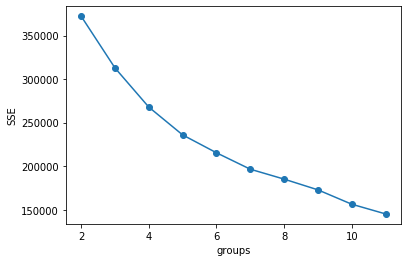

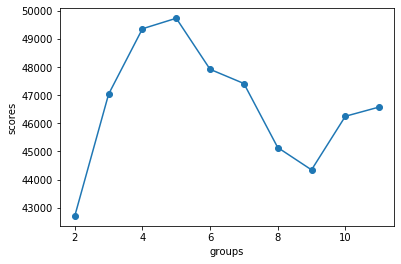

In [38]:
import sklearn.cluster as skc
from sklearn import metrics
import matplotlib.pyplot as plt

distortions=[]
scores=[]
for i in range(2,12):
    km = skc.KMeans(n_clusters=i, random_state=1)
    y_pred=km.fit_predict(dummy_df) 
    scores.append(metrics.calinski_harabaz_score(dummy_df, y_pred))
    distortions.append(km.inertia_)
    
plt.plot(range(2,12),distortions,marker='o')
plt.xlabel('groups')
plt.ylabel("SSE")
plt.show()

plt.plot(range(2,12),scores,marker='o')
plt.xlabel('groups')
plt.ylabel("scores")
plt.show()

In [39]:
km = skc.KMeans(n_clusters=5, random_state=1)
y_pred=km.fit_predict(dummy_df)


r1=pd.Series(km.labels_).value_counts()
r2=pd.DataFrame(km.cluster_centers_)
r=pd.concat([r2,r1],axis=1)
r.columns=list(dummy_df.columns)+[u'类别数目']

r.T

,0,1,2,3,4
male_TF_False,8.781674e-01,8.365411e-01,9.019919e-01,9.011235e-01,8.941816e-01
male_TF_True,1.205948e-01,1.621213e-01,9.715957e-02,9.795100e-02,1.042988e-01
package_type_base,-7.229217e-13,7.235392e-01,9.092493e-01,2.676299e-02,8.918032e-01
package_type_economy,5.768996e-14,1.513710e-01,9.075075e-02,5.812788e-02,1.081968e-01
package_type_enhanced,1.000000e+00,1.245696e-01,-1.236233e-13,1.079775e-03,-1.313949e-13
preferred_genre_comedy,7.679560e-01,-1.515454e-13,8.821848e-01,8.998123e-03,8.941376e-01
preferred_genre_drama,1.112601e-01,1.000000e+00,-1.011136e-13,7.455588e-04,-1.122435e-13
preferred_genre_international,2.982637e-02,2.633657e-14,3.939083e-02,2.642877e-02,4.133633e-02
preferred_genre_other,2.100739e-02,1.404432e-14,2.212943e-02,1.863897e-02,2.133985e-02
preferred_genre_regional,6.618532e-02,1.525863e-14,5.629494e-02,1.691647e-02,4.318622e-02


## Churn Model

In [40]:
merged_sub = pd.get_dummies(merged_sub, prefix=['package_type', 'preferred_genre', 'intended_use','male_TF',  'attribution_technical', 'attribution_survey', 'plan_type',  'payment_type'], columns=['package_type', 'preferred_genre', 'intended_use','male_TF',  'attribution_technical', 'attribution_survey', 'plan_type',  'payment_type'])

In [41]:
merged_sub 

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,months_per_bill_period,monthly_price,discount_price,cancel_before_trial_end,...,plan_type_low_gbp_14_day_trial,plan_type_low_sar_no_trial,plan_type_low_uae_no_trial,payment_type_Apple Pay,payment_type_CBD,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter,payment_type_Unknown
1,23383224,0.000000,22.951579,0.000000,False,70.0,4,4.7343,4.5141,False,...,0,0,0,0,0,0,0,0,0,1
2,26844789,3.362885,36.001186,1.951776,False,25.0,4,4.7343,4.5141,False,...,0,0,0,0,0,0,0,0,0,1
3,29417030,0.000000,20.051667,0.000000,False,30.0,4,4.7343,4.5141,False,...,0,0,0,0,0,0,0,0,0,1
4,26723159,3.731089,22.951579,2.506384,False,28.0,4,4.7343,4.5141,False,...,0,0,0,0,0,0,0,0,0,1
5,24810928,0.000000,20.051667,0.000000,False,70.0,4,4.7343,4.5141,True,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,25835684,2.169904,24.401536,1.881068,False,43.0,4,4.7343,4.5141,False,...,0,0,0,0,0,0,0,0,0,1
227623,21434712,2.594078,28.751405,1.905485,False,38.0,4,4.7343,4.5141,False,...,0,0,0,0,0,0,0,0,0,1
227624,25843074,2.361370,27.301448,1.835189,True,49.0,4,4.7343,4.5141,True,...,0,0,0,0,0,0,1,0,0,0
227625,24799085,0.000000,31.651317,0.000000,False,45.0,4,4.7343,4.5141,True,...,0,0,0,0,0,0,0,0,0,1


In [42]:
X = merged_sub[merged_sub.columns.drop('current_sub_TF')]
X = X[X.columns.drop('subid')]
y = merged_sub['current_sub_TF'].ravel()


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in [90,100,110]:
    for j in [3,4,5]:
        clf = GradientBoostingClassifier(n_estimators = i, max_depth = j)
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        print('n_estimators: ',i,' depth: ',j)
        print(accuracy_score(y_test,y_pred))
        print(classification_report(y_test, y_pred))


n_estimators:  90  depth:  3
0.6894446289881206
              precision    recall  f1-score   support

       False       0.67      0.71      0.69     30884
        True       0.71      0.67      0.69     32335

    accuracy                           0.69     63219
   macro avg       0.69      0.69      0.69     63219
weighted avg       0.69      0.69      0.69     63219

n_estimators:  90  depth:  4
0.6905360730160237
              precision    recall  f1-score   support

       False       0.67      0.71      0.69     30884
        True       0.71      0.67      0.69     32335

    accuracy                           0.69     63219
   macro avg       0.69      0.69      0.69     63219
weighted avg       0.69      0.69      0.69     63219

n_estimators:  90  depth:  5
0.6902671665163954
              precision    recall  f1-score   support

       False       0.67      0.72      0.69     30884
        True       0.71      0.67      0.69     32335

    accuracy                          

In [47]:
clf = GradientBoostingClassifier(n_estimators = 110, max_depth = 4)
clf.fit(X_train,y_train)
y_pred = clf.predict(X)


In [ ]:
y_pred = y_pred.astype(int)
revenue = np.array(X['revenue_net'])
revenue

In [ ]:
expected_revenue = np.dot(y_pred,revenue)
expected_revenue
expected_revenue/len(y_pred)

In [ ]:
X.columns.values.tolist()